The Romberg, Gaussian Quadrature, and Asymptotic expansion methods for the integral $$\int_{0}^{1} e^{i x t^2} \, dt$$


In [ ]:
import numpy as np
import scipy.special as sp
from scipy.integrate import romberg
from scipy.integrate import quad
import time

testing_asymptotic=[]
def asymptotic_approx(x, n):
    first_expansion = (1/2) * np.sqrt(np.pi / x) * np.exp(1j * np.pi / 4)

    # Summation part
    second_expansion = 0
    sum=0
    for i in range(n):
        term = ((-1j) ** i) * sp.gamma(i + 0.5) / sp.gamma(0.5) / (x ** (i + 1))
        sum += term
    second_expansion = -(1/2) * 1j * np.exp(1j * x) * sum

    # Combine the two terms
    result = first_expansion + second_expansion
    return result
def integrand(t):
    return np.exp(1j * x * t**2)
x_array=[0.1,100, 1000000]
for x in x_array:
  # Gaussian Quadrature
  start_time = time.time()
  result_integral, error = quad(lambda t: integrand(t), 0, 1)
  end_time = time.time()
  integral_time = end_time - start_time
  for i in range(3):
    # Romberg method
    start_time = time.time()
    result_romberg = romberg(integrand, 0, 1, divmax=(i+2)*5)
    end_time = time.time()
    romberg_time = end_time - start_time
    # Print results and times
    print("\nRomberg Method with", (i+2)*5, "level of extrapolation when x is", x)
    print("Real part:", result_romberg.real)
    print("Imaginary part:", result_romberg.imag)
    print("Time taken:", romberg_time, "seconds")


  print("\nQuad Method when x is", x)
  print("Real part:", result_integral.real)
  print("Imaginary part:", result_integral.imag)
  print("Time taken:", integral_time, "seconds")

  for i in range(4):
    start_time = time.time()
    result_asymptotic = asymptotic_approx(x, i)
    if i==3:
      testing_asymptotic=result_asymptotic
    end_time = time.time()
    asymptotic_time = end_time - start_time
    print("\nAsymptotic Series Approximation with", i+1, "terms", "when x is", x)
    print("Real part:", result_asymptotic.real)
    print("Imaginary part:", result_asymptotic.imag)
    print("Time taken:", asymptotic_time, "seconds")


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:611: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
<ipython-input-5-46df34f9c174>:34: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  result_romberg = romberg(integrand, 0, 1, divmax=(i+2)*5)
/usr/local/lib/python3.10/dist-packages/scipy/_lib/deprecation.py:91: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.191082e-07
  return fun(*args, **kwargs)
<ipython-input-5-46df34f9c174>:28: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result_integral, error = quad(lambda t: integrand(t), 0, 1)
/usr/local/lib/python3.10/dist-packages/scipy/_lib/deprecation.py:91: AccuracyWarning: divmax (10) exceeded. Latest difference = 2.996325e-02
  return fun(*args, **kwargs)
/usr


Romberg Method with 10 level of extrapolation when x is 0.1
Real part: 0.9990004628561379
Imaginary part: 0.033309531383964676
Time taken: 0.0007846355438232422 seconds

Romberg Method with 15 level of extrapolation when x is 0.1
Real part: 0.9990004628561379
Imaginary part: 0.033309531383964676
Time taken: 0.0003383159637451172 seconds

Romberg Method with 20 level of extrapolation when x is 0.1
Real part: 0.9990004628561379
Imaginary part: 0.033309531383964676
Time taken: 0.00025010108947753906 seconds

Quad Method when x is 0.1
Real part: 0.99900046285614
Imaginary part: 0.0
Time taken: 0.0026650428771972656 seconds

Asymptotic Series Approximation with 1 terms when x is 0.1
Real part: 1.9816636488030057
Imaginary part: 1.9816636488030055
Time taken: 2.2649765014648438e-05 seconds

Asymptotic Series Approximation with 2 terms when x is 0.1
Real part: 2.4808307320371465
Imaginary part: -2.993357177587124
Time taken: 3.1948089599609375e-05 seconds

Asymptotic Series Approximation wit

/usr/local/lib/python3.10/dist-packages/scipy/_lib/deprecation.py:91: AccuracyWarning: divmax (20) exceeded. Latest difference = 8.528452e-04
  return fun(*args, **kwargs)


Testing procedures (pass/fail). Comparing 4th order asymptotic expansion with Romberg/Quadrature method

In [13]:
import numpy as np
import scipy.special as sp
from scipy.integrate import romberg
from scipy.integrate import quad
import time
tol=0.01 #tolerance
testing_asymptotic=0
def asymptotic_approx(x, n):
    first_expansion = (1/2) * np.sqrt(np.pi / x) * np.exp(1j * np.pi / 4)

    # Summation part
    second_expansion = 0
    sum=0
    for i in range(n):
        term = ((-1j) ** i) * sp.gamma(i + 0.5) / sp.gamma(0.5) / (x ** (i + 1))
        sum += term
    second_expansion = -(1/2) * 1j * np.exp(1j * x) * sum

    # Combine the two terms
    result = first_expansion + second_expansion
    return result
def integrand(t):
    return np.exp(1j * x * t**2)
x_array=[0.1,100, 1000000]
for x in x_array:
  for i in range(4):
    start_time = time.time()
    result_asymptotic = asymptotic_approx(x, i)
    if i==3:
      testing_asymptotic=result_asymptotic
    end_time = time.time()
    asymptotic_time = end_time - start_time
  # Gaussian Quadrature
  start_time = time.time()
  result_integral, error = quad(lambda t: integrand(t), 0, 1)
  end_time = time.time()
  integral_time = end_time - start_time
  if abs(testing_asymptotic-result_integral)<=tol:
    print("Quadrature method when x=",x,"Test passed")
  else:
    print("Quadrature method when x=",x,"Test failed")
  for i in range(3):
    # Romberg method
    start_time = time.time()
    result_romberg = romberg(integrand, 0, 1, divmax=(i+2)*5)
    end_time = time.time()
    romberg_time = end_time - start_time
    if abs(testing_asymptotic-result_romberg)<=tol:
      print("Romberg method with",(i+2)*5,"orders when x=",x, "Test passed")
    else:
      print("Romberg method with",(i+2)*5,"orders when x=",x, "Test failed")



/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:611: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
<ipython-input-13-24829371ab2d>:45: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  result_romberg = romberg(integrand, 0, 1, divmax=(i+2)*5)
/usr/local/lib/python3.10/dist-packages/scipy/_lib/deprecation.py:91: AccuracyWarning: divmax (10) exceeded. Latest difference = 1.191082e-07
  return fun(*args, **kwargs)
<ipython-input-13-24829371ab2d>:35: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  result_integral, error = quad(lambda t: integrand(t), 0, 1)
/usr/local/lib/python3.10/dist-packages/scipy/_lib/deprecation.py:91: AccuracyWarning: divmax (10) exceeded. Latest difference = 2.996325e-02
  return fun(*args, **kwargs)
/u

Quadrature method when x= 0.1 Test failed
Romberg method with 10 orders when x= 0.1 Test failed
Romberg method with 15 orders when x= 0.1 Test failed
Romberg method with 20 orders when x= 0.1 Test failed
Quadrature method when x= 100 Test failed
Romberg method with 10 orders when x= 100 Test passed
Romberg method with 15 orders when x= 100 Test passed
Romberg method with 20 orders when x= 100 Test passed
Quadrature method when x= 1000000 Test failed
Romberg method with 10 orders when x= 1000000 Test failed
Romberg method with 15 orders when x= 1000000 Test passed
Romberg method with 20 orders when x= 1000000 Test passed


/usr/local/lib/python3.10/dist-packages/scipy/_lib/deprecation.py:91: AccuracyWarning: divmax (20) exceeded. Latest difference = 8.528452e-04
  return fun(*args, **kwargs)


Graph of the $$e^{i x t^2} $$ when x=1000


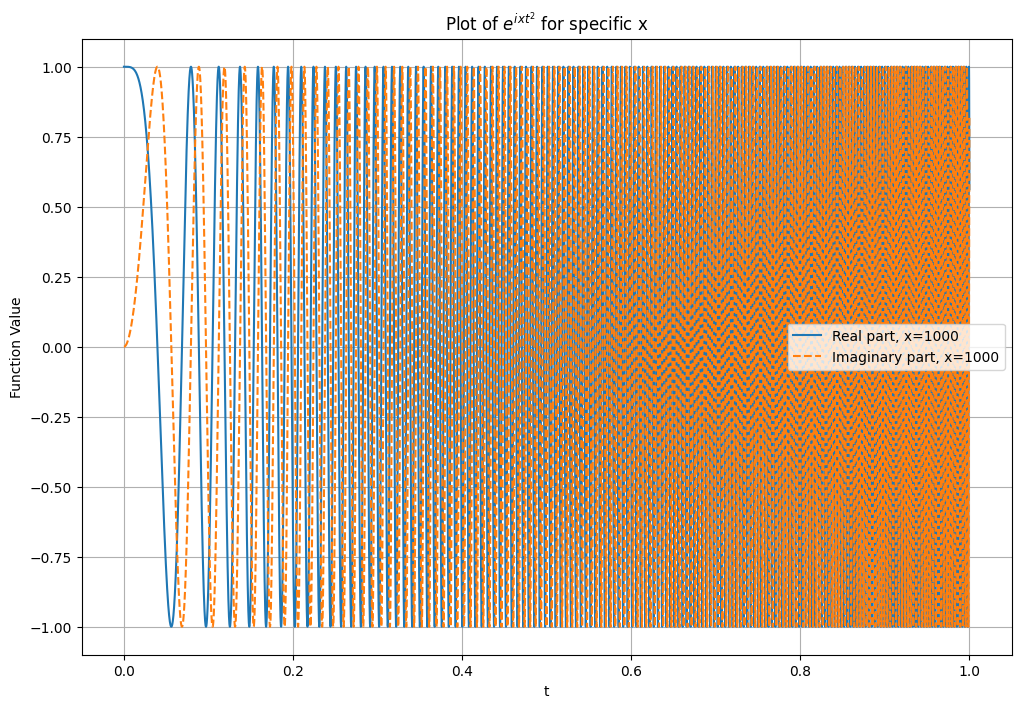

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to plot
def func(t, x):
    return np.exp(1j * x * t**2)

# Define values of x to explore
x_values = [1000]
t_values = np.linspace(0, 1, 1000000)

# Plot the real and imaginary parts for each x
plt.figure(figsize=(12, 8))
for x in x_values:
    y_values = func(t_values, x)
    plt.plot(t_values, y_values.real, label=f'Real part, x={x}')
    plt.plot(t_values, y_values.imag, linestyle='--', label=f'Imaginary part, x={x}')
# Labeling the plot
plt.title("Plot of $e^{ixt^2}$ for specific x")
plt.xlabel("t")
plt.ylabel("Function Value")
plt.legend()
plt.grid(True)
plt.show()


Contour deformation plot

<ipython-input-34-03bb2331d41e>:9: RuntimeWarning: invalid value encountered in sqrt
  y_sqrt = np.sqrt(x**2 - 1)


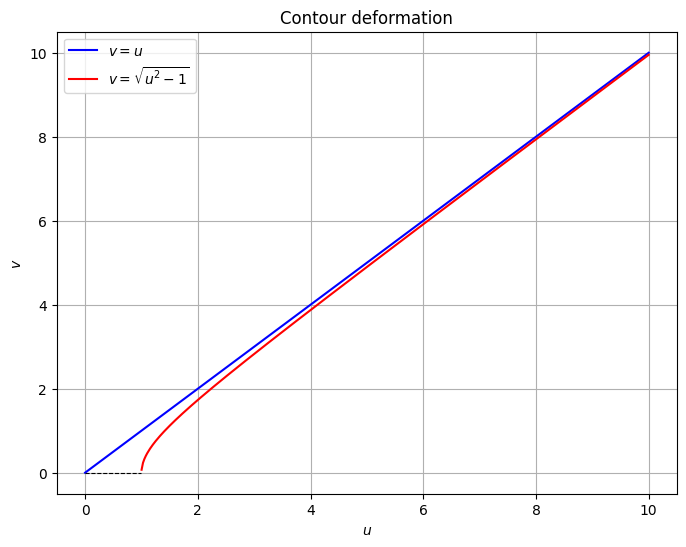

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x values including a small range around zero to connect the points in (0,1)
x = np.linspace(0, 10, 400)

# Define the functions
y_line = x
y_sqrt = np.sqrt(x**2 - 1)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x, y_line, label=r"$v = u$", color='blue')
plt.plot(x[x >= 1], y_sqrt[x >= 1], label=r"$v = \sqrt{u^2 - 1}$", color='red')  # Only plot for x >= 1

# Connecting the points between 0 and 1 on the x-axis with a line for visualization
x_connect = np.linspace(0, 1, 50)
y_connect = np.zeros_like(x_connect)  # y = 0 to connect the line smoothly
plt.plot(x_connect, y_connect, 'k--', linewidth=0.8)  # Dashed line for connection

# Labels and title
plt.xlabel(r"$u$")
plt.ylabel(r"$v$")
plt.title("Contour deformation")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


 $$\int_{0}^{2} e^{i x t^2} \, dt$$ Approximation of this integral through the Asymptotic and Romberg method

In [ ]:
import numpy as np
import scipy.special as sp
from scipy.integrate import romberg
from scipy.integrate import quad
import time
x=1000000
def asymptotic_approx(x):
    first_expansion = (1/2) * np.sqrt(np.pi / x) * np.exp(1j * np.pi / 4)
    result = first_expansion
    return result

# Asymptotic expansion
start_time = time.time()
result_asymptotic = asymptotic_approx(x)
end_time = time.time()
asymptotic_time = end_time - start_time

# Our integral
def integrand(t):
    return np.exp(1j * x * t**2)

for i in range(2):
  # Romberg method
  start_time = time.time()
  result_romberg = romberg(integrand, 0, 2, divmax=(i+4)*5)
  end_time = time.time()
  romberg_time = end_time - start_time
  # Print results and times
  print("\nRomberg Integration Calculation with", (i+4)*5, "level of extrapolation")
  print("Real part:", result_romberg.real)
  print("Imaginary part:", result_romberg.imag)
  print("Time taken:", romberg_time, "seconds")

start_time = time.time()
result_asymptotic = asymptotic_approx(x)
end_time = time.time()
asymptotic_time = end_time - start_time
print("\nAsymptotic Series Approximation with 1 term")
print("Real part:", result_asymptotic.real)
print("Imaginary part:", result_asymptotic.imag)
print("Time taken:", asymptotic_time, "seconds")

<ipython-input-34-3f8ba6c53e90>:25: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  result_romberg = romberg(integrand, 0, 2, divmax=(i+4)*5)
/usr/local/lib/python3.10/dist-packages/scipy/_lib/deprecation.py:91: AccuracyWarning: divmax (20) exceeded. Latest difference = 3.052755e-03
  return fun(*args, **kwargs)



Romberg Integration Calculation with 20 level of extrapolation
Real part: 0.0018146685462319533
Imaginary part: 0.0005114518552716501
Time taken: 1.9814507961273193 seconds

Romberg Integration Calculation with 25 level of extrapolation
Real part: 0.0006264095305075406
Imaginary part: 0.000626622051002958
Time taken: 63.67764067649841 seconds

Asymptotic Series Approximation with 1 term
Real part: 0.0006266570686577501
Imaginary part: 0.00062665706865775
Time taken: 0.00018310546875 seconds


 $$\int_{0}^{1} e^{i x t^2} e^{-t} \, dt$$ Approximation of this integral through the Asymptotic and Romberg method

In [ ]:
import numpy as np
import scipy.special as sp
from scipy.integrate import romberg
from scipy.integrate import quad
import time
x=1000000
def asymptotic_approx(x):
    first_expansion = (1/2) * np.sqrt(np.pi / x) * np.exp(1j * np.pi / 4)
    result = first_expansion
    return result

# Asymptotic expansion
start_time = time.time()
result_asymptotic = asymptotic_approx(x)
end_time = time.time()
asymptotic_time = end_time - start_time

# Our integral
def integrand(t):
    return np.exp(1j * x * t**2)*np.exp(-t)

for i in range(2):
  # Romberg method
  start_time = time.time()
  result_romberg = romberg(integrand, 0, 1, divmax=(i+4)*5)
  end_time = time.time()
  romberg_time = end_time - start_time
  # Print results and times
  print("\nRomberg Integration Calculation with", (i+4)*5, "level of extrapolation")
  print("Real part:", result_romberg.real)
  print("Imaginary part:", result_romberg.imag)
  print("Time taken:", romberg_time, "seconds")

start_time = time.time()
result_asymptotic = asymptotic_approx(x)
end_time = time.time()
asymptotic_time = end_time - start_time
print("\nAsymptotic Series Approximation with 1 term")
print("Real part:", result_asymptotic.real)
print("Imaginary part:", result_asymptotic.imag)
print("Time taken:", asymptotic_time, "seconds")

<ipython-input-35-5269460625eb>:25: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  result_romberg = romberg(integrand, 0, 1, divmax=(i+4)*5)
/usr/local/lib/python3.10/dist-packages/scipy/_lib/deprecation.py:91: AccuracyWarning: divmax (20) exceeded. Latest difference = 3.734217e-04
  return fun(*args, **kwargs)



Romberg Integration Calculation with 20 level of extrapolation
Real part: 0.0006369791357200706
Imaginary part: 0.0006035910325808496
Time taken: 3.090348243713379 seconds

Romberg Integration Calculation with 25 level of extrapolation
Real part: 0.0006265925335259483
Imaginary part: 0.0006259849208463608
Time taken: 25.8288254737854 seconds

Asymptotic Series Approximation with 1 term
Real part: 0.0006266570686577501
Imaginary part: 0.00062665706865775
Time taken: 0.00019359588623046875 seconds


 $$\int_{0}^{1} e^{i x t^2} (1-t) \, dt$$ Approximation of this integral through the Asymptotic and Romberg method

In [ ]:
import numpy as np
import scipy.special as sp
from scipy.integrate import romberg
from scipy.integrate import quad
import time
x=1000000
def asymptotic_approx(x):
    first_expansion = (1/2) * np.sqrt(np.pi / x) * np.exp(1j * np.pi / 4)
    result = first_expansion
    return result

# Asymptotic expansion
start_time = time.time()
result_asymptotic = asymptotic_approx(x)
end_time = time.time()
asymptotic_time = end_time - start_time

# Our integral
def integrand(t):
    return np.exp(1j * x * t**2)*(1-t)

for i in range(2):
  # Romberg method
  start_time = time.time()
  result_romberg = romberg(integrand, 0, 1, divmax=(i+4)*5)
  end_time = time.time()
  romberg_time = end_time - start_time
  # Print results and times
  print("\nRomberg Integration Calculation with", (i+4)*5, "level of extrapolation")
  print("Real part:", result_romberg.real)
  print("Imaginary part:", result_romberg.imag)
  print("Time taken:", romberg_time, "seconds")

start_time = time.time()
result_asymptotic = asymptotic_approx(x)
end_time = time.time()
asymptotic_time = end_time - start_time
print("\nAsymptotic Series Approximation with 1 term")
print("Real part:", result_asymptotic.real)
print("Imaginary part:", result_asymptotic.imag)
print("Time taken:", asymptotic_time, "seconds")

<ipython-input-36-443648c33265>:25: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  result_romberg = romberg(integrand, 0, 1, divmax=(i+4)*5)
/usr/local/lib/python3.10/dist-packages/scipy/_lib/deprecation.py:91: AccuracyWarning: divmax (20) exceeded. Latest difference = 1.502701e-04
  return fun(*args, **kwargs)



Romberg Integration Calculation with 20 level of extrapolation
Real part: 0.0006305659702377111
Imaginary part: 0.0006170951965789778
Time taken: 2.0508644580841064 seconds

Romberg Integration Calculation with 25 level of extrapolation
Real part: 0.0006266570681514275
Imaginary part: 0.0006261570692956001
Time taken: 17.312480449676514 seconds

Asymptotic Series Approximation with 1 term
Real part: 0.0006266570686577501
Imaginary part: 0.00062665706865775
Time taken: 0.00012230873107910156 seconds
